In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

year_month_format = mdates.DateFormatter('%m/%y')

In [12]:
trans = pd.read_csv('../data/sales_data_sample.csv')

In [13]:
trans.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [14]:
california_sales = trans[trans['STATE']=='CA']

In [15]:
california_sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
3,10145,45,83.26,6,3746.70,8/25/03 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/03 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/03 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/03 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
29,10140,37,100.00,11,7374.10,7/24/03 0:00,Shipped,3,7,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Large


In [16]:
california_sales['DATE'] = pd.to_datetime(california_sales['ORDERDATE'])
california_sales = california_sales.set_index(california_sales['DATE'])

/Users/joshua/miniconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
weekly_ca_sales = california_sales.resample('W').sum()
weekly_ca_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
DATE,,,,,,,,,
2003-03-30,101118,360,818.06,31,31094.14,10,30,20030,883
2003-04-06,0,0,0.00,0,0.00,0,0,0,0
2003-04-13,0,0,0.00,0,0.00,0,0,0,0
2003-04-20,0,0,0.00,0,0.00,0,0,0,0
2003-04-27,0,0,0.00,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2005-05-01,0,0,0.00,0,0.00,0,0,0,0
2005-05-08,0,0,0.00,0,0.00,0,0,0,0
2005-05-15,0,0,0.00,0,0.00,0,0,0,0


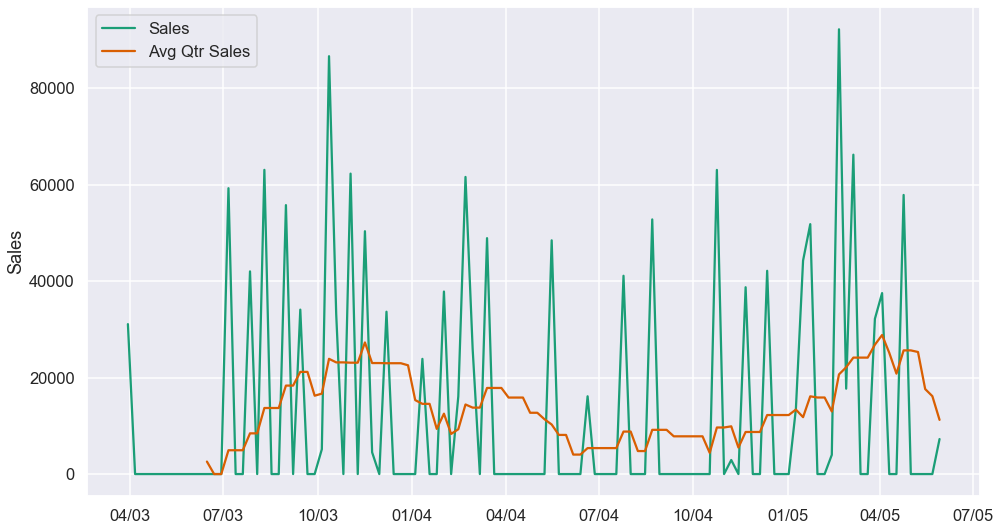

In [21]:
average_sales = weekly_ca_sales.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(weekly_ca_sales.index, weekly_ca_sales.SALES, label='Sales')
ax.plot(average_sales.index, average_sales.SALES, label = 'Avg Qtr Sales')

ax.legend(loc='best')
ax.set_ylabel('Sales')
ax.xaxis.set_major_formatter(year_month_format)